### 1. Introduction


   - **Contexte et objectif:** 
   
   Le speed dating est un processus fascinant qui permet aux individus de rencontrer de nombreuses personnes potentielles en peu de temps. Cette analyse vise à comprendre les différents facteurs qui influencent les rencontres réussies et à explorer les dynamiques et les préférences individuelles au sein de l'expérience de speed dating.
   L'équipe marketing d'une application de dating a besoin d'aide pour un nouveau projet. Ils connaissent une diminution du nombre de matchs et essaient de trouver un moyen de comprendre ce qui rend les gens intéressés les uns aux autres.

   - **Import du dataset:**

   Nous allons utilisé la biliotheque Pandas de Python pour importer le dataset et faire les futures manipulations de données. Ensuite à l'aide des bibliotheques Numpy, Seaborn et Matplotlib, nous pourrons transformer les données et la rendre utiles pour faire de la visualisation.

   - **Description du dataset:** 
   
   Le jeu de données comprend 8 378 observations et 195 variables et couvre divers aspects du speed dating, comme les attributs personnels, les intérêts, les préférences et les évaluations reçues par les partenaires. Les participants sont à peu près également répartis entre les hommes (49,1 %) et les femmes (50,9 %). Les âges des participants varient de 18 à 58 ans, avec une moyenne d'environ 26 ans. Les participants proviennent de divers domaines d'études, notamment le droit, les mathématiques, les sciences sociales, la médecine, l'ingénierie, l'éducation, les arts et d'autres.

In [184]:
# Chargement des differentes bibliotheques necessaire à notre etude
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [185]:
# Import du dataset
df = pd.read_csv("/Users/arvind.b/Documents/Jedha DA/05-Exploratory Data Analysis/D5-Speed Dating Project/DS_speed_dating.csv", encoding= "unicode_escape")

# Visualisation des premieres lignes de nos donnees
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

### 2. Nettoyage et préparation des données


   - **Analyse des valeurs manquantes:** Identification et traitement des valeurs manquantes.

   Il y a plusieurs colonnes avec des valeurs manquantes dans notre dataset. Voici les 10 colonnes ayant le pourcentage le plus élevé de valeurs manquantes:

In [186]:
# Calcul et affichage du pourcentage de valeurs manquantes pour chaque colonne
missing_values_percentage = df.isnull().mean() * 100
missing_values_summary = pd.DataFrame({'Colonne': missing_values_percentage.index, 'Valeurs Manquantes': missing_values_percentage.values})
missing_values_summary = missing_values_summary[missing_values_summary['Valeurs Manquantes'] > 0].sort_values(by='Valeurs Manquantes', ascending=False)

# Affichage des 10 premières colonnes avec le pourcentage le plus élevé de valeurs manquantes
missing_values_summary.head(10)


,Colonne,Valeurs Manquantes
160,num_in_3,92.026737
159,numdat_3,82.143710
68,expnum,78.515159
123,sinc7_2,76.665075
126,amb7_2,76.665075
127,shar7_2,76.438291
122,attr7_2,76.318931
124,intel7_2,76.318931
125,fun7_2,76.318931
194,amb5_3,75.936978


Ces colonnes nécessitent une attention particulière lors du nettoyage des données. Selon l'importance de ces variables pour l'analyse, nous pourrions décider de les imputer, de les ignorer ou d'utiliser d'autres méthodes pour les traiter.

### 3. Analyse Univariée

Quelle est la distribution des âges des participants ?

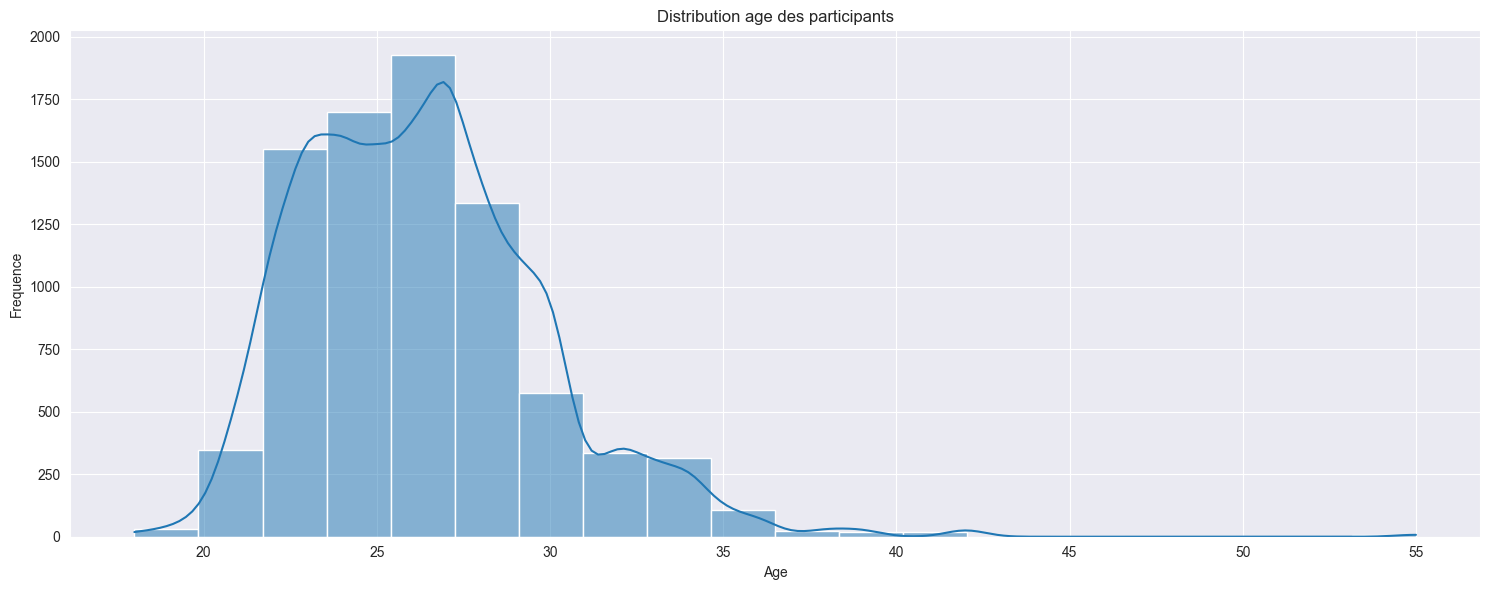

In [187]:
sns.set_style("darkgrid")

# Distribution de l'age des participants
plt.figure(figsize=(15, 6))
sns.histplot(df['age'].dropna(), bins=20, kde=True)
plt.title('Distribution age des participants')
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.tight_layout()
plt.show()

Observation : La distribution des âges des participants semble être approximativement normale, avec la majorité des participants ayant entre 20 et 30 ans.

Combien de participants ont obtenu un match (où 'match' = 1) ?

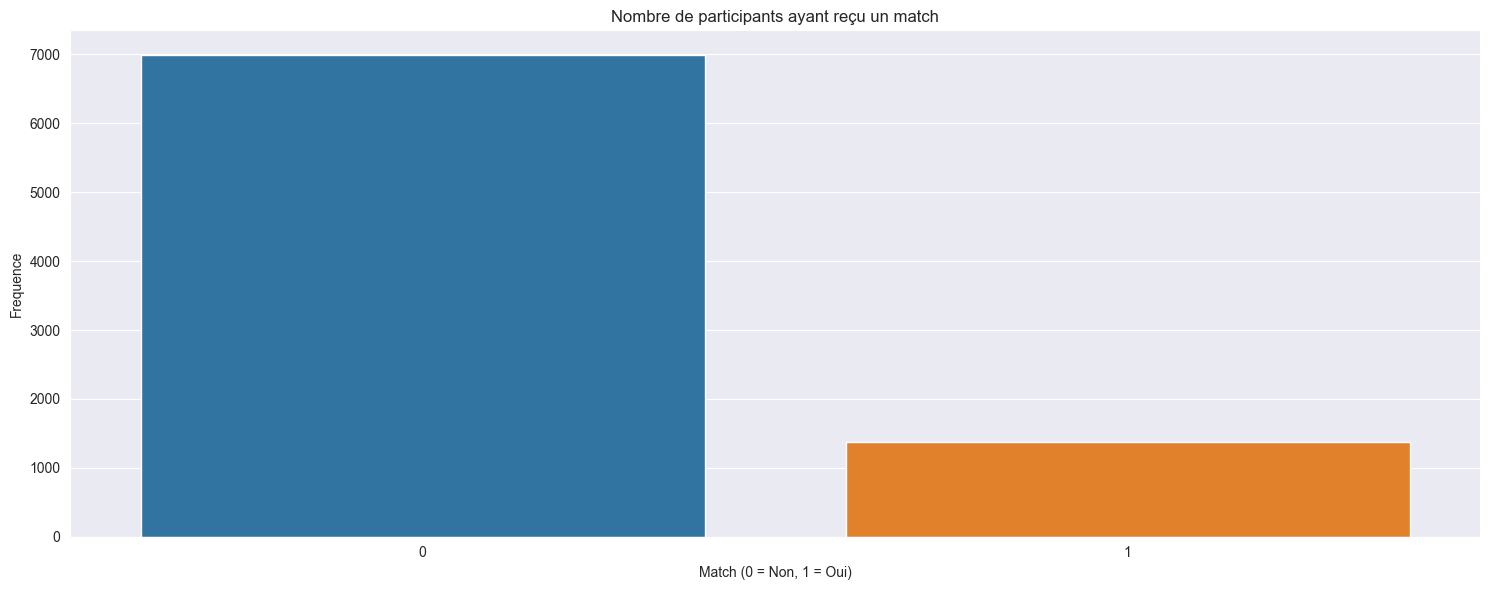

In [188]:
# Nombre de participants ayant reçu un match
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='match')
plt.title('Nombre de participants ayant reçu un match')
plt.xlabel('Match (0 = Non, 1 = Oui)')
plt.ylabel('Frequence')
plt.tight_layout()
plt.show()


Observation : Le graphique montre que la majorité des participants n'ont pas obtenu de correspondance (où 'match' = 0). Cela signifie que dans la plupart des cas, soit le participant, soit son partenaire, ou les deux, ont décidé de ne pas poursuivre avec un deuxième rendez-vous.

Quelle est la distribution des scores d'attractivité (attr_o) donnés par les partenaires ?

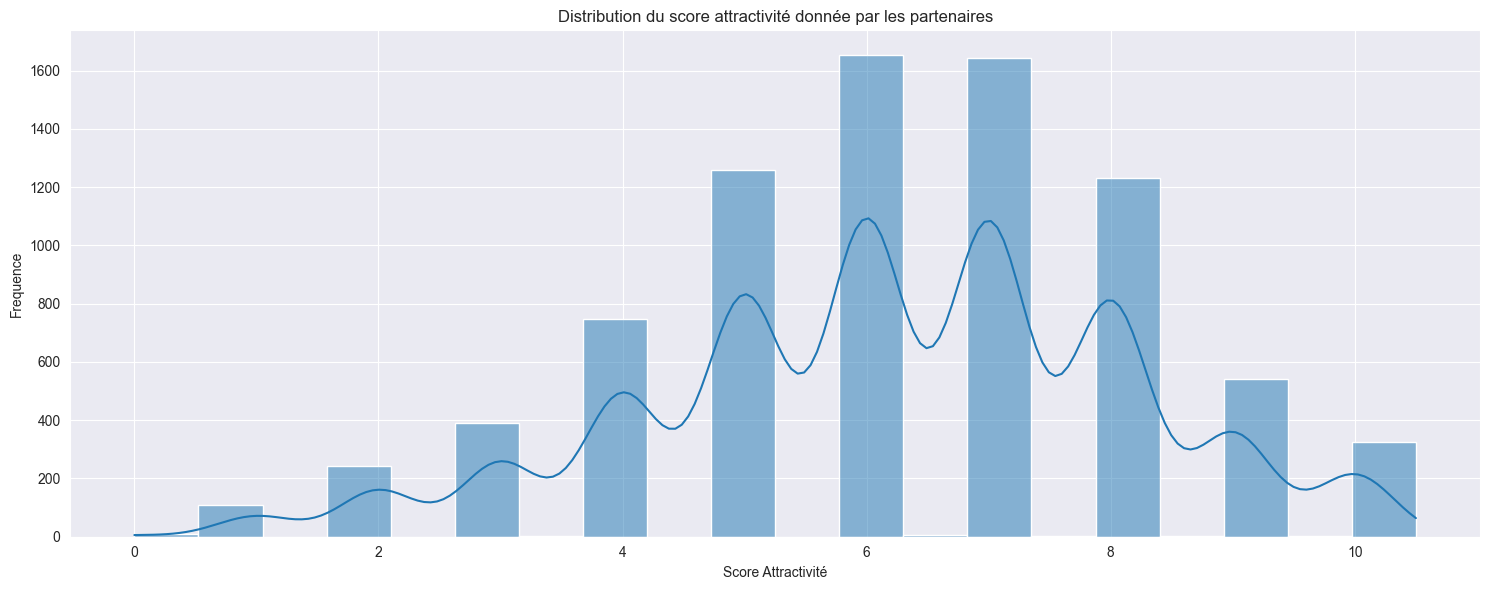

In [189]:
# Distribution du score d'attractivité donnée par les partenaires
plt.figure(figsize=(15, 6))
sns.histplot(df['attr_o'].dropna(), bins=20, kde=True)
plt.title('Distribution du score attractivité donnée par les partenaires')
plt.xlabel('Score Attractivité')
plt.ylabel('Frequence')
plt.tight_layout()
plt.show()


Observation : La distribution des scores d'attractivité donnés par les partenaires semble être légèrement asymétrique à droite, avec la majorité des scores se situant entre 5 et 8.

Quelle est la distribution des préférences déclarées pour chaque attribut, séparément pour les hommes et les femmes ?

/var/folders/39/9v2r64292m98c6c1_qf1hf_r0000gn/T/ipykernel_949/922659259.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pref_clean.dropna(inplace=True)
/var/folders/39/9v2r64292m98c6c1_qf1hf_r0000gn/T/ipykernel_949/922659259.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pref_clean['attribute'] = df_pref_clean[preference_cols].sum(axis=1)


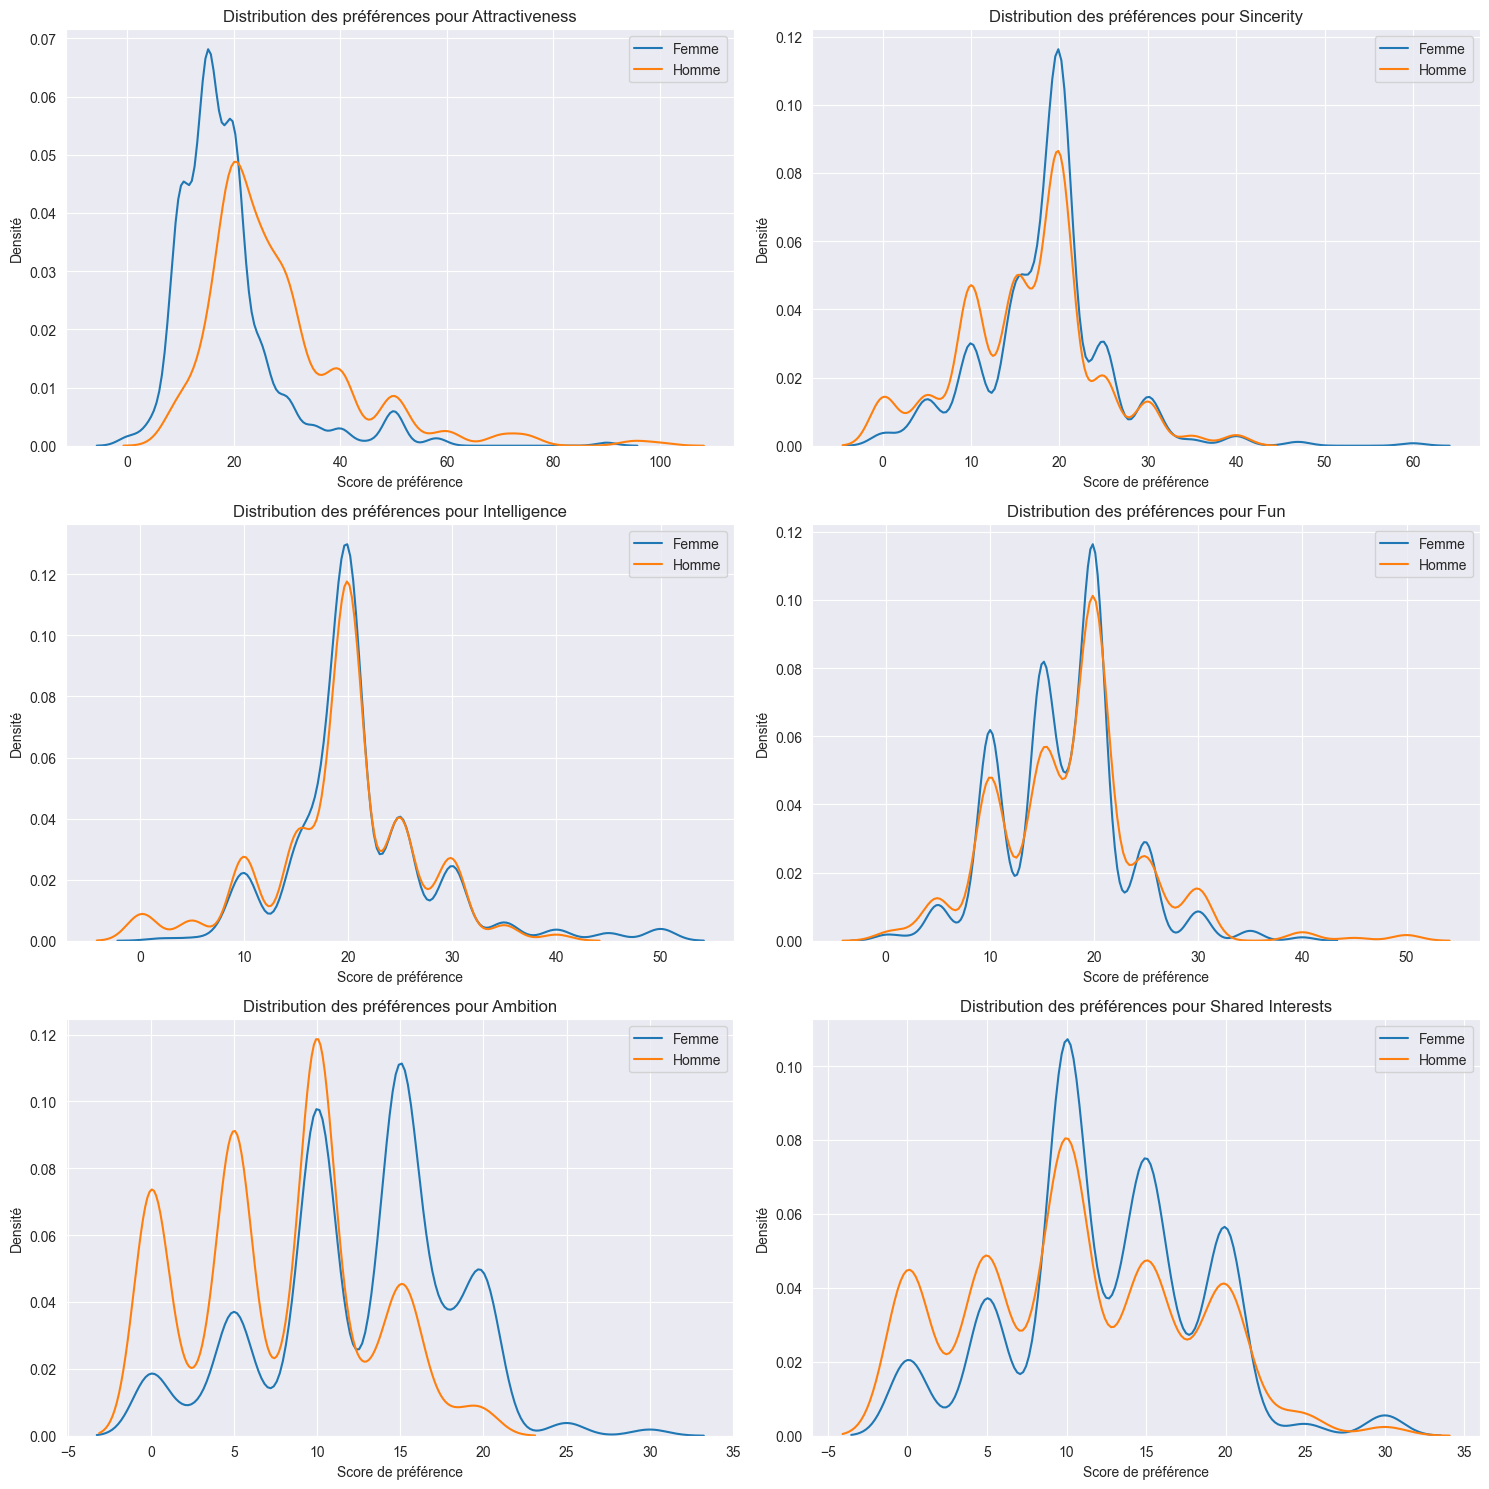

In [190]:
# Sélectionner les colonnes désirées
preferences = ['iid', 'id', 'gender', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
df_pref = df[preferences]

# Supprimer les lignes où 'iid' est entre 6 et 9
df_pref_clean = df_pref[(df_pref['iid'] < 6) | (df_pref['iid'] > 9)]

# Supprimer les lignes avec des valeurs manquantes
df_pref_clean.dropna(inplace=True)

# Définir les colonnes de préférences
preference_cols = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

# Créer une nouvelle colonne 'attribute' en additionnant les valeurs des colonnes de préférences
df_pref_clean['attribute'] = df_pref_clean[preference_cols].sum(axis=1)

# Supprimer les lignes où 'attribute' est différent de 100
df_pref_clean2 = df_pref_clean[df_pref_clean['attribute'] == 100]

# Définir les colonnes de préférences et leurs étiquettes
labels_preferences = ['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition', 'Shared Interests']

# Créer les graphiques
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for ax, col, label in zip(axs.flatten(), preference_cols, labels_preferences):
    sns.kdeplot(data=df_pref_clean2[df_pref_clean2['gender'] == 0], x=col, ax=ax, label='Femme')
    sns.kdeplot(data=df_pref_clean2[df_pref_clean2['gender'] == 1], x=col, ax=ax, label='Homme')
    ax.set_title(f'Distribution des préférences pour {label}')
    ax.set_xlabel('Score de préférence')
    ax.set_ylabel('Densité')
    ax.legend()

plt.tight_layout()
plt.show()


Observation : Les graphiques montrent les distributions des préférences déclarées pour chaque attribut, séparément pour les hommes et les femmes. On peut observer des variations dans les distributions en fonction du sexe du participant. Par exemple, les femmes semblent donner plus d'importance à l'ambition et aux intérêts partagés par rapport aux hommes, tandis que les hommes donnent plus d'importance à l'attractivité.

Combien de participants ont choisi un partenaire de la même race (samerace) ?

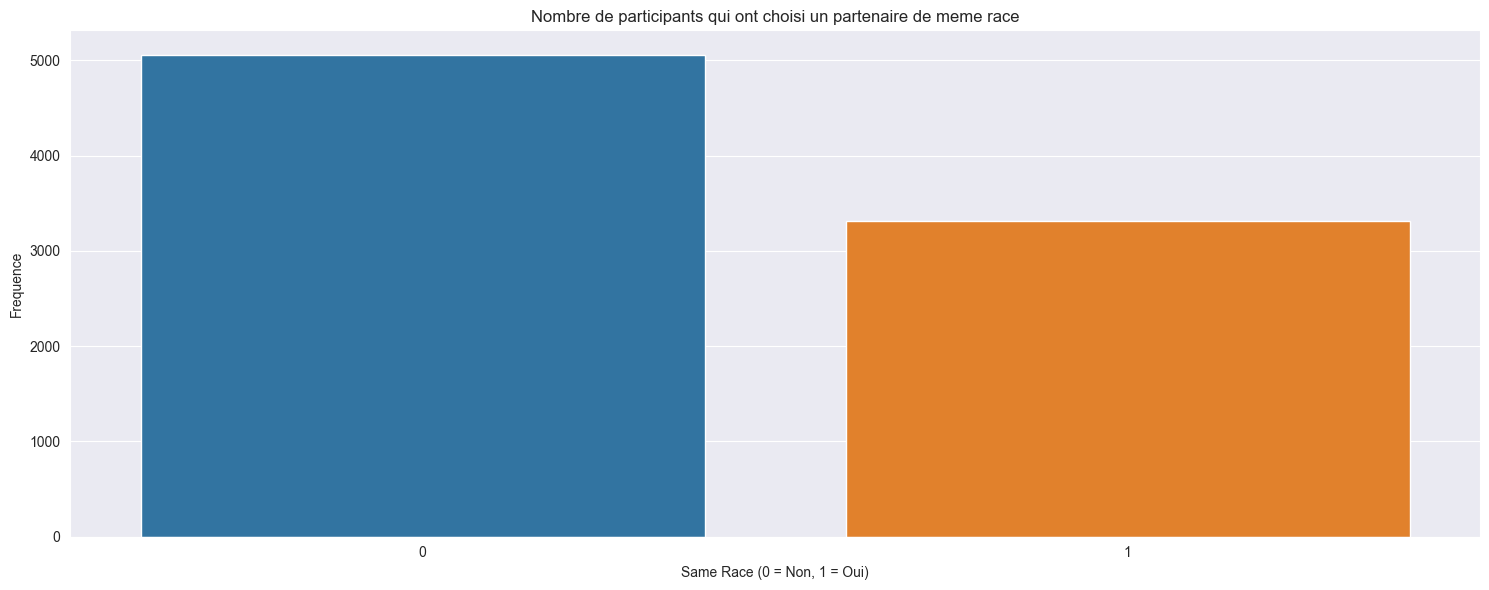

In [191]:
# Nombre de participants qui ont choisi un partenaire de meme race
plt.figure(figsize=(15, 6))
sns.countplot(data=df[['samerace']].dropna(), x='samerace')
plt.title('Nombre de participants qui ont choisi un partenaire de meme race')
plt.xlabel('Same Race (0 = Non, 1 = Oui)')
plt.ylabel('Frequence')
plt.tight_layout()
plt.show()


Observation : Le graphique montre que la majorité des participants n'ont pas choisi un partenaire de la même race (où 'samerace' = 0). Cela pourrait indiquer que la race n'est pas un facteur déterminant pour la plupart des participants lorsqu'ils choisissent un partenaire lors d'un événement de speed dating.

### 4. Analyse Bivariée


Quelle est le taux de match en fonction de la race ?

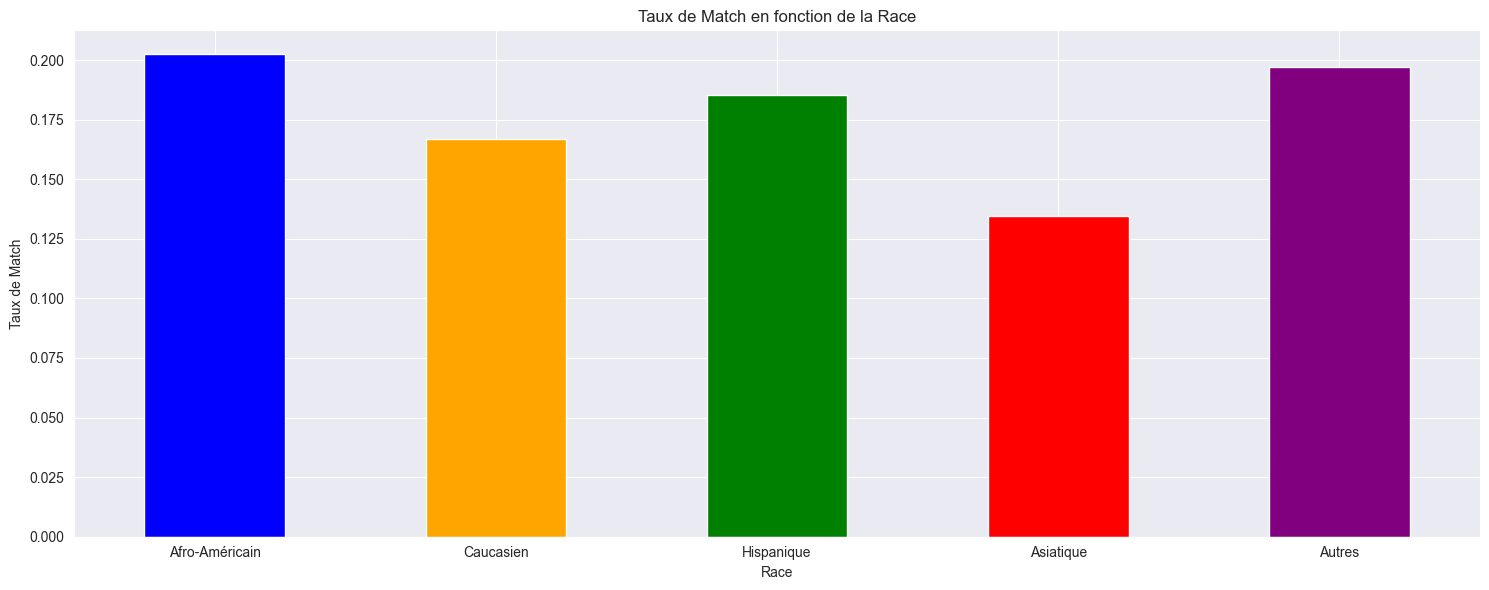

In [192]:
df_race = df[['match', 'race']].dropna()
race_match_rates = df_race.groupby('race')['match'].mean()

# Mappage des catégories de race aux noms fournis
mapping_race = {
    1.0: "Afro-Américain",
    2.0: "Caucasien",
    3.0: "Hispanique",
    4.0: "Asiatique",
    6.0: "Autres"
}
race_match_rates_clean = race_match_rates.rename(index=mapping_race)

# Définition d'une palette de couleurs pour les barres
color = ['blue', 'orange', 'green', 'red', 'purple']

# Tracé du taux de correspondance par race
plt.figure(figsize=(15, 6))
race_match_rates_clean.plot(kind='bar', color=color)
plt.title('Taux de Match en fonction de la Race')
plt.xlabel('Race')
plt.ylabel('Taux de Match')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Observation : On remarque que les taux de matchs sont assez similaires avec les asiatiques un peu en retrait, cela nous indique qu'il y a tres peu de differences dans les choix de match.

La difference d'age entre les partenaires a t-il une incidence sur le taux de match ?

/var/folders/39/9v2r64292m98c6c1_qf1hf_r0000gn/T/ipykernel_949/1631459935.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_clean['diff_age'] = df_age_clean['age'] - df_age_clean['age_o']


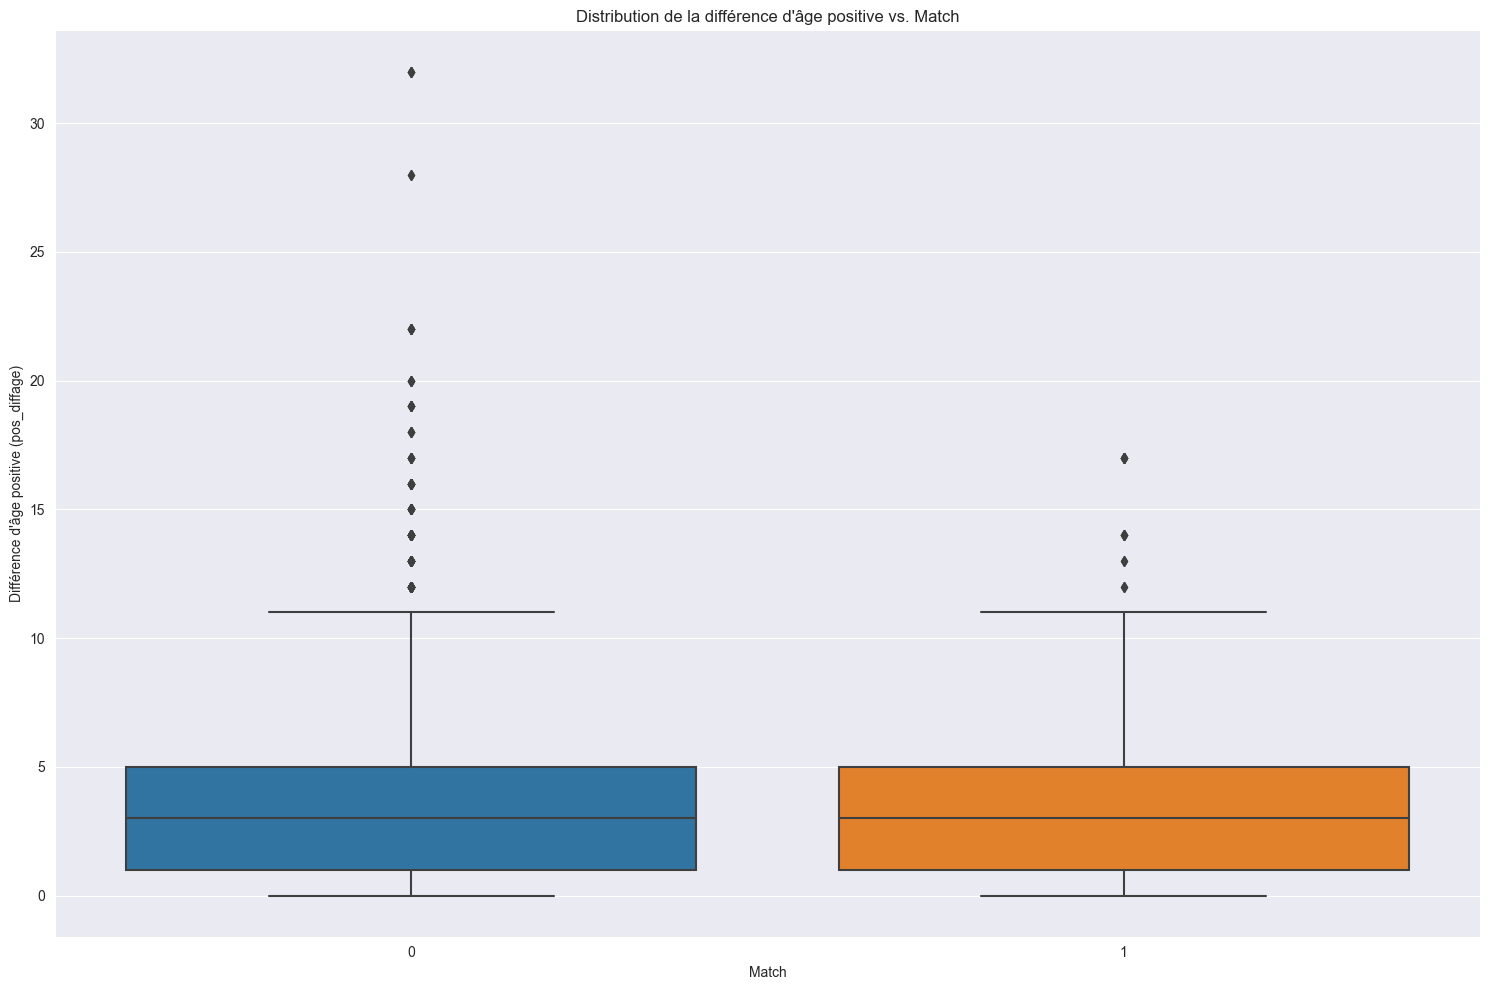

-0.06766968200052344

In [193]:
# Sélection des colonnes 'match', 'age', et 'age_o'
df_age = df[['match', 'age', 'age_o']]

# Suppression des lignes avec des valeurs manquantes
df_age_clean = df_age.dropna()

# Création de la colonne "diff_age" (différence d'âge)
df_age_clean['diff_age'] = df_age_clean['age'] - df_age_clean['age_o']

# Copie du dataframe nettoyé
df_diffage = df_age_clean.copy()

# Création de la colonne "pos_diffage" (différence d'âge positive)
df_diffage['pos_diffage'] = df_diffage['diff_age'].apply(lambda x: abs(x))

# Tracé d'un diagramme à moustaches pour visualiser la distribution
plt.figure(figsize=(15, 10))
sns.boxplot(x="match", y="pos_diffage", data=df_diffage)
plt.title("Distribution de la différence d'âge positive vs. Match")
plt.xlabel("Match")
plt.ylabel("Différence d'âge positive (pos_diffage)")
plt.tight_layout()
plt.show()

# Calcul du coefficient de corrélation de Spearman
correlation = df_diffage['pos_diffage'].corr(df_diffage['match'], method = 'spearman')
correlation

Observation : On peut observer que les distributions de "pos_diffage" pour les valeurs "match" 0 et 1 sont assez similaires. Cela suggère qu'il n'y a pas de corrélation forte entre la différence d'âge et le taux de match.
La valeur obtenue du coefficient de correlation de Spearman est proche de zéro, ce qui confirme notre observation visuelle : il n'y a pas de corrélation forte entre la différence d'âge positive ("pos_diffage") et le taux de correspondance ("match").

Y a-t-il une corrélation entre l'âge des participants et leurs décisions de match ?

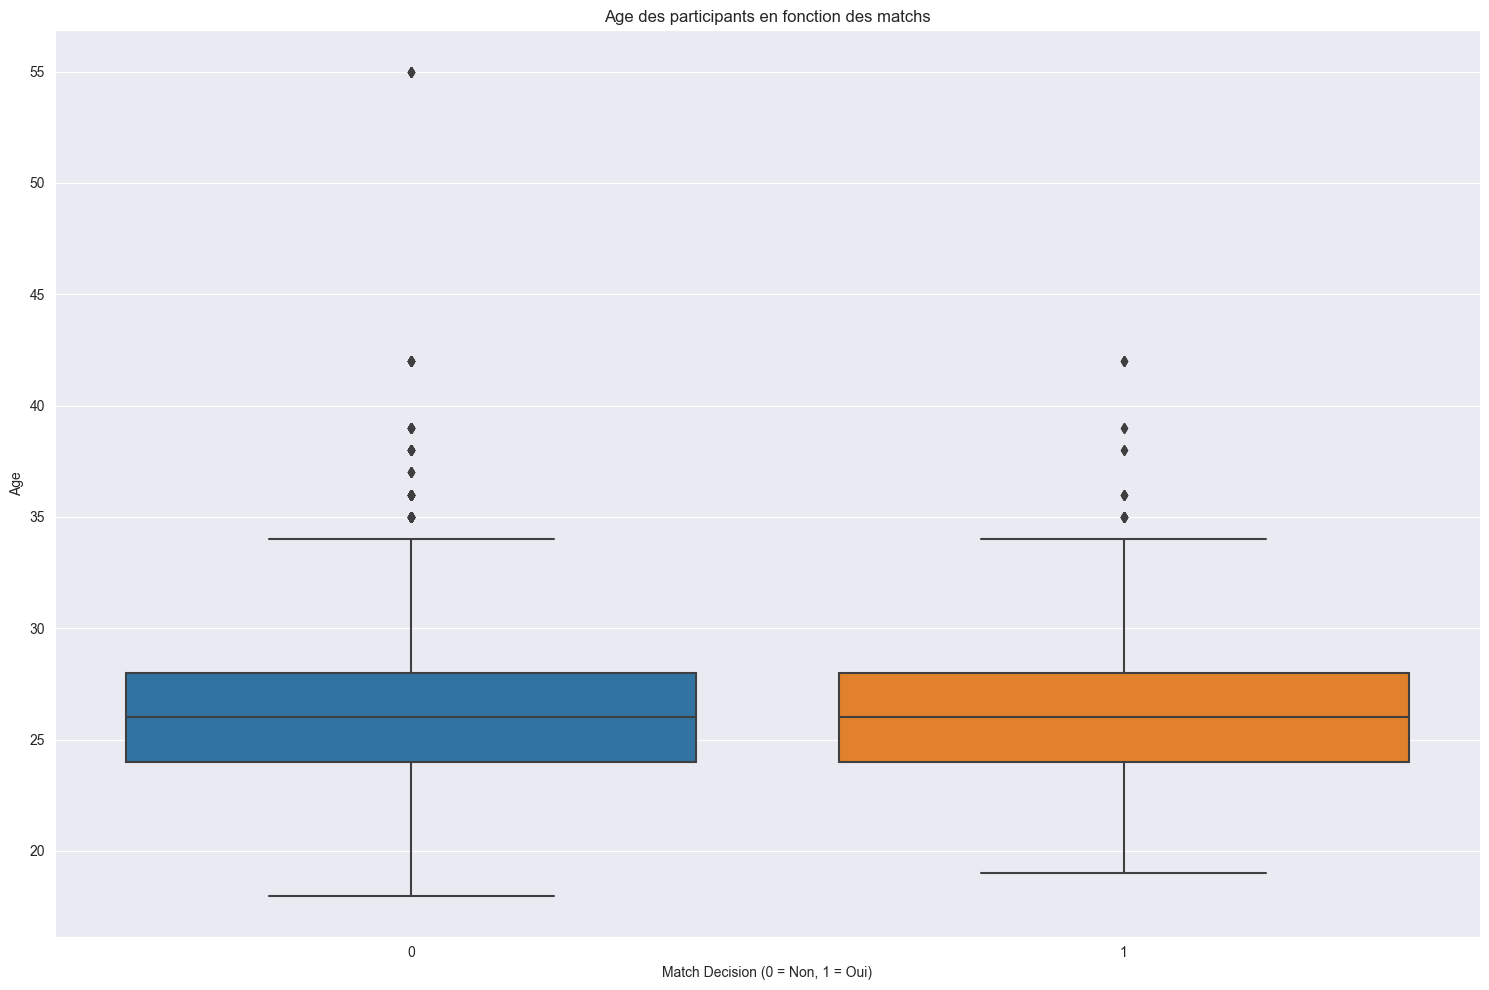

-0.03163158380358884

In [194]:
# Correlation entre l'age des participants et les decisions de matchs

df3 = df[['match', 'age']].dropna()
plt.figure(figsize=(15, 10))
sns.boxplot(data=df3, x='match', y='age')
plt.title('Age des participants en fonction des matchs')
plt.xlabel('Match Decision (0 = Non, 1 = Oui)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# Calcul du coefficient de corrélation de Spearman
correlation = df_diffage['age'].corr(df_diffage['match'], method = 'spearman')
correlation

Observation : Le graphique en boîte montre que l'âge médian des participants qui ont obtenu un match est légèrement inférieur à celui des participants qui n'ont pas obtenu de match. Cependant, la distribution des âges est assez similaire pour les deux groupes, ce qui suggère que l'âge n'a pas un impact significatif sur la décision de match.

Y a-t-il une différence dans les préférences ou les décisions de match en fonction du domaine d'études des participants ?

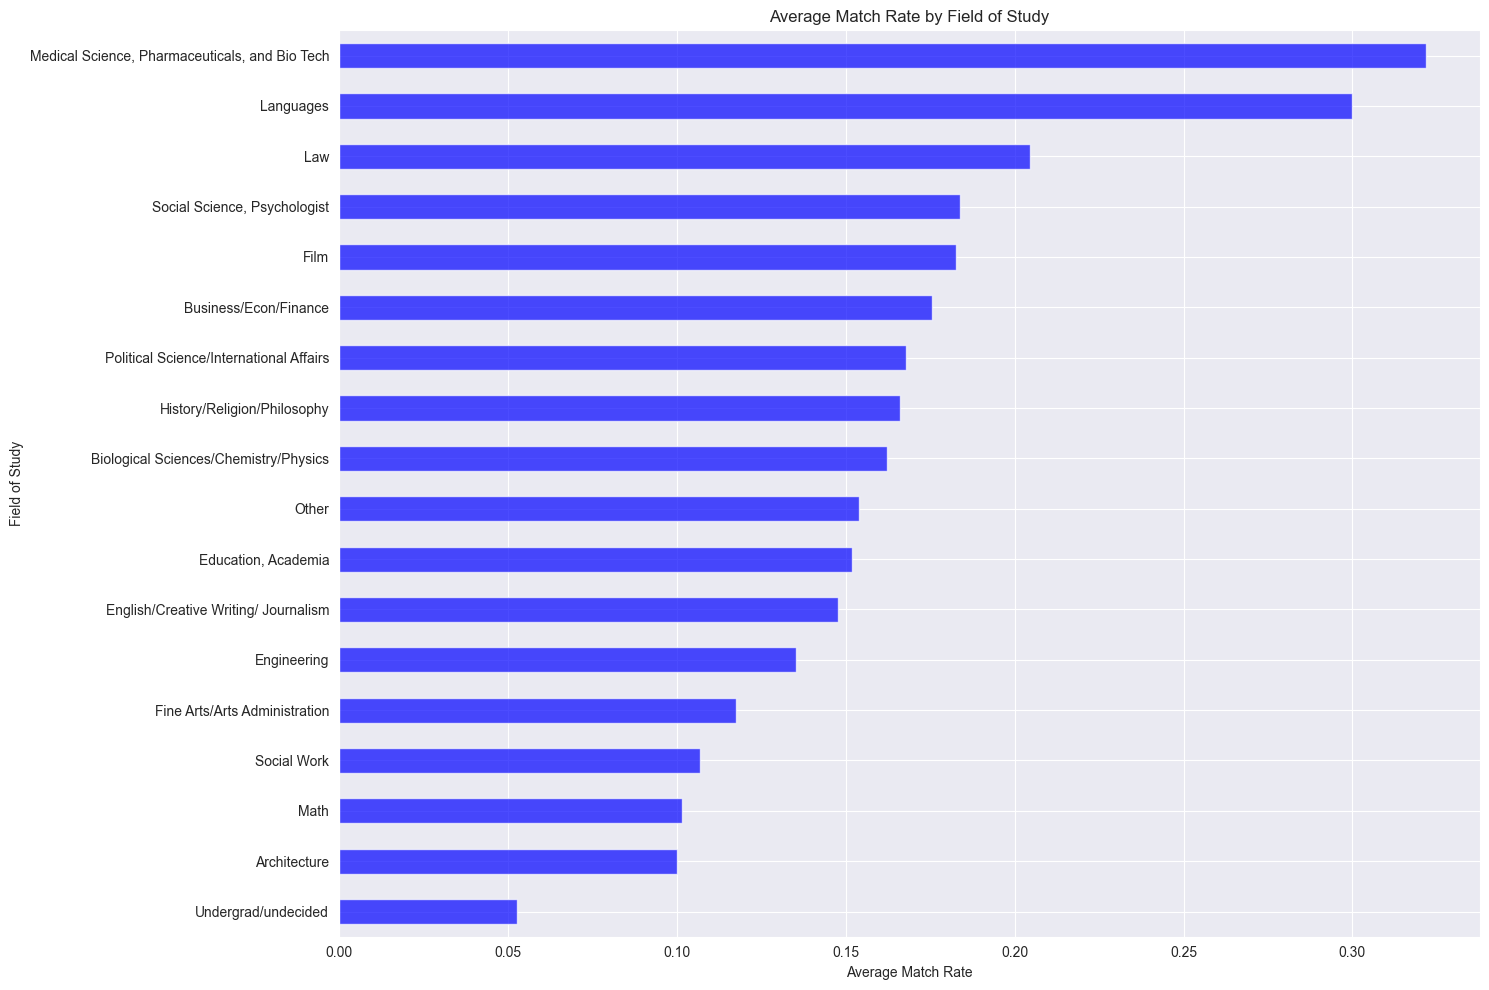

In [195]:
# Mapping des domaines d'etudes à l'aide de la documentation
field_mapping = {
    1: 'Law',
    2: 'Math',
    3: 'Social Science, Psychologist',
    4: 'Medical Science, Pharmaceuticals, and Bio Tech',
    5: 'Engineering',
    6: 'English/Creative Writing/ Journalism',
    7: 'History/Religion/Philosophy',
    8: 'Business/Econ/Finance',
    9: 'Education, Academia',
    10: 'Biological Sciences/Chemistry/Physics',
    11: 'Social Work',
    12: 'Undergrad/undecided',
    13: 'Political Science/International Affairs',
    14: 'Film',
    15: 'Fine Arts/Arts Administration',
    16: 'Languages',
    17: 'Architecture',
    18: 'Other'
}

# Remplacement des codes de domaines d'etudes par leurs noms dans le DataFrame
df['field_cd'] = df['field_cd'].replace(field_mapping)

# Calcul des moyennes et visualisation des matchs moyens par domaines d'etudes
df.groupby('field_cd')['match'].mean().sort_values(ascending=False).plot(kind='barh', figsize=(15, 10), color='blue', alpha=0.7)
plt.title('Average Match Rate by Field of Study')
plt.xlabel('Average Match Rate')
plt.ylabel('Field of Study')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Observation : Le graphique montre le taux de match pour les domaines d'études les plus couramment représentés parmi les participants. On peut voir que les taux de match varient considérablement en fonction du domaine d'étude, ce qui suggère que le domaine d'étude peut avoir un impact sur les décisions de match.

Y a-t-il une différence dans les préférences ou les décisions de match en fonction de l'objectif déclaré des participants lors de l'événement de speed dating ?

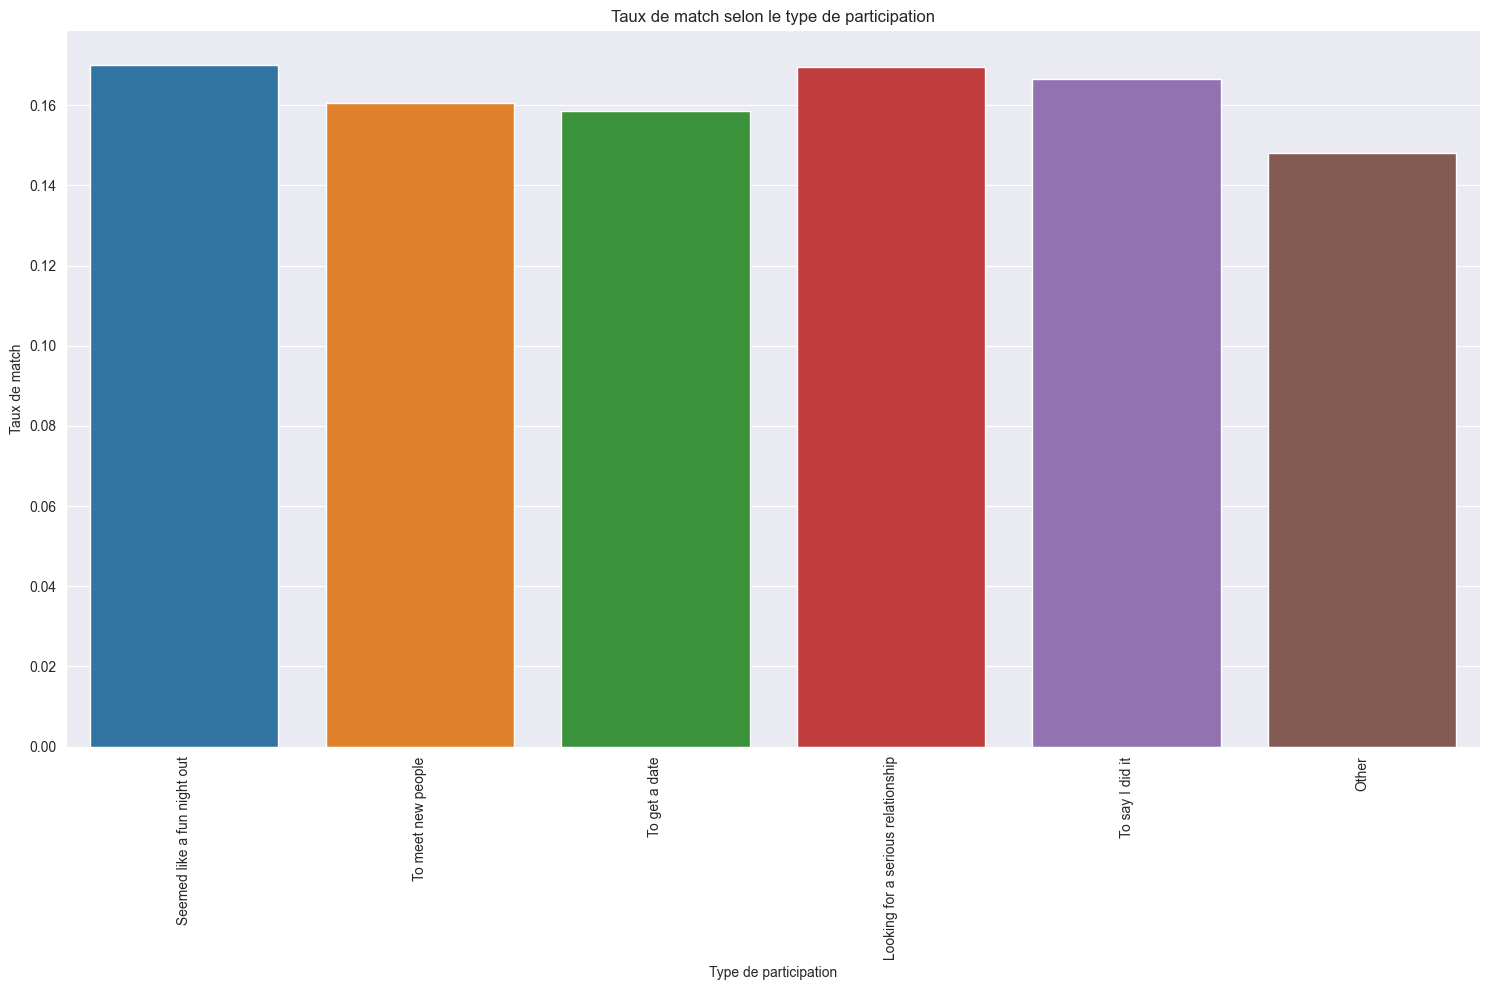

In [196]:
# Difference dans les decisions de match basé sur le but de la participation
df1 = df[['goal', 'match']].dropna()
goal_match_rates = df1.groupby('goal')['match'].mean()

plt.figure(figsize=(15, 10))
sns.barplot(x=goal_match_rates.index, y=goal_match_rates.values)
plt.title('Taux de match selon le type de participation')
plt.xlabel('Type de participation')
plt.xticks(ticks=range(6), labels=['Seemed like a fun night out', 'To meet new people', 'To get a date', 'Looking for a serious relationship', 'To say I did it', 'Other'])
plt.xticks(rotation=90)
plt.ylabel('Taux de match')
plt.tight_layout()
plt.show()


Observation : Le graphique montre le taux de match en fonction de l'objectif déclaré de la participation à l'événement de speed dating. On peut observer que les taux de match varient en fonction de l'objectif de participation. Les participants qui étaient là pour "rechercher une relation serieuse" ou parce que cela "semblait être une soirée amusante" ont tendance à avoir des taux de match plus élevés.

### 5. Analyse Multivariée

Quels sont les attributs qui sont le plus fortement corrélés avec l'obtention d'un oui pour un deuxième rendez-vous selon l'avis du partenaire ?

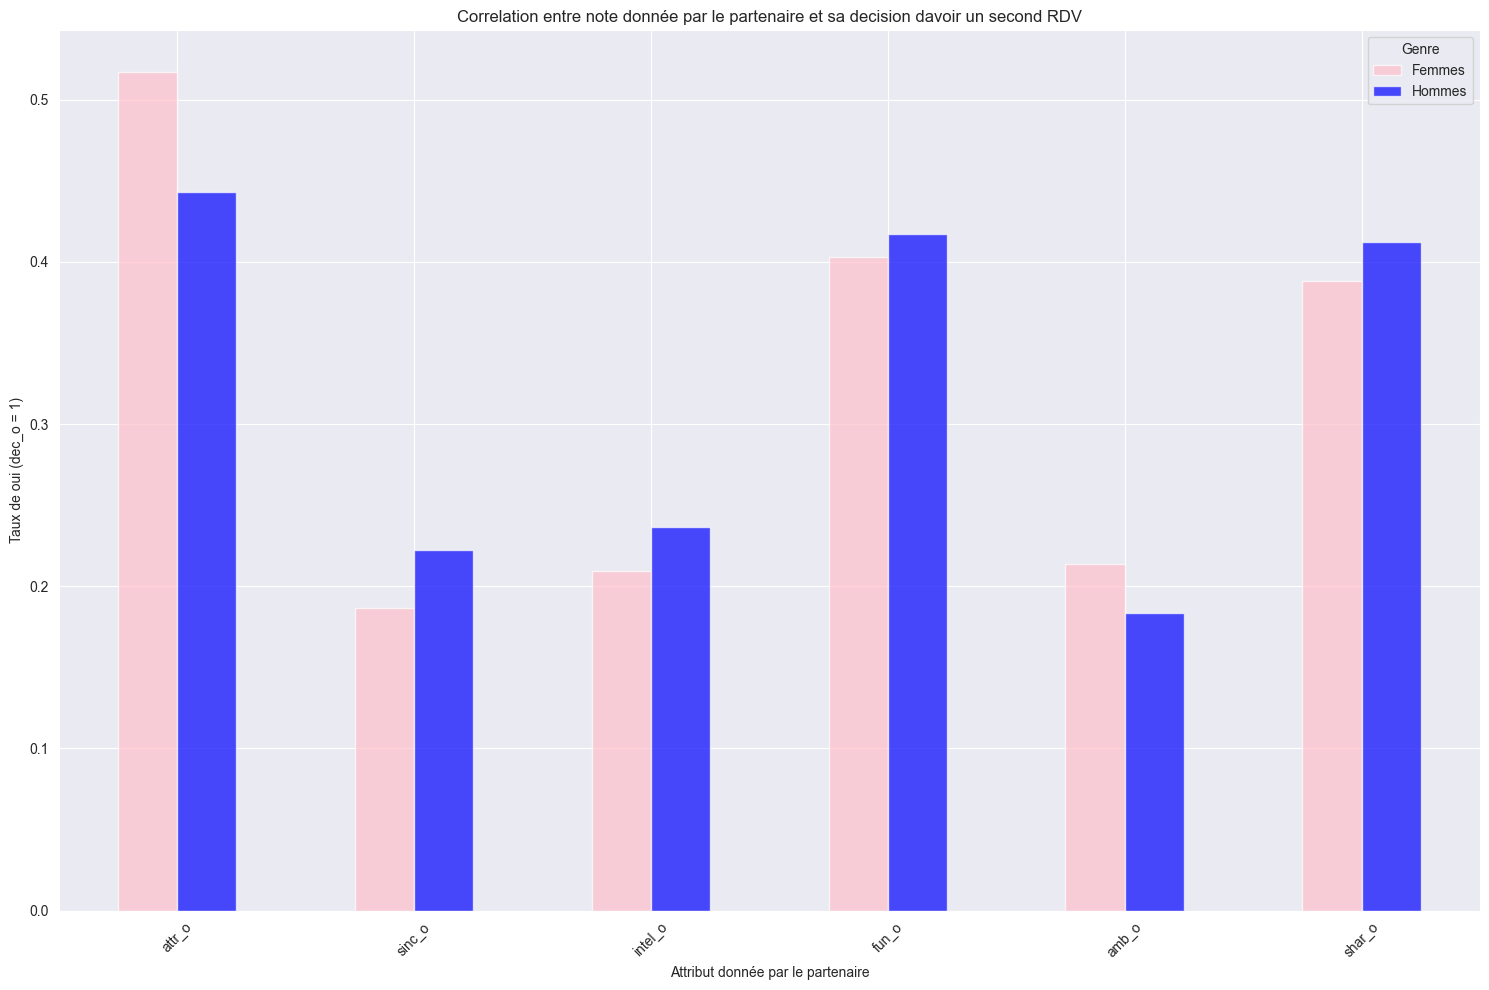

In [197]:
# Creation d'un nouveau DataFrame avec les colonnes adequates
df_dec = df[['gender', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']]

# Definition des colonnes d'attributs
attributes_columns = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']

# Eliminer les lignes avec des valeurs manquantes
df_dec = df_dec.dropna()

# Calcul de la correlation entre chaque attributs et 'dec_o' pour chaque genre
correlations_attributes_dec_o = {}
for column in attributes_columns:
    correlations_attributes_dec_o[column] = (
        df_dec[df_dec['gender'] == 0][[column, 'dec_o']].corr().iloc[0, 1],
        df_dec[df_dec['gender'] == 1][[column, 'dec_o']].corr().iloc[0, 1]
    )

correlations_attributes_dec_o

# Conversion des dictionnaires de correlations en DataFrame
correlations_df = pd.DataFrame(correlations_attributes_dec_o, index=['Femmes', 'Hommes']).T

# Creation d'un barplot des correlations
correlations_df.plot(kind='bar', figsize=(15, 10), alpha=0.7, color=['pink', 'blue'])
plt.title('Correlation entre note donnée par le partenaire et sa decision davoir un second RDV')
plt.xlabel('Attribut donnée par le partenaire')
plt.ylabel('Taux de oui (dec_o = 1)')
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation : Comme on peut le voir que ce soit pour les hommes et les femmes, ce sont les attributs d'attractivité (attr_o), de sens de l'amusement (fun_o) et d'interets partagés (shar_o) qui aident le plus a decrocher un 2eme rendez vous.
A noter que pour les femmes l'attribut d'acttracvitié est tres fortement corrélé (>50%) à l'obtention d'un second rendez vous.

Quelle est la correlation entre attributs données par les partenaires sur les cartes de score ?

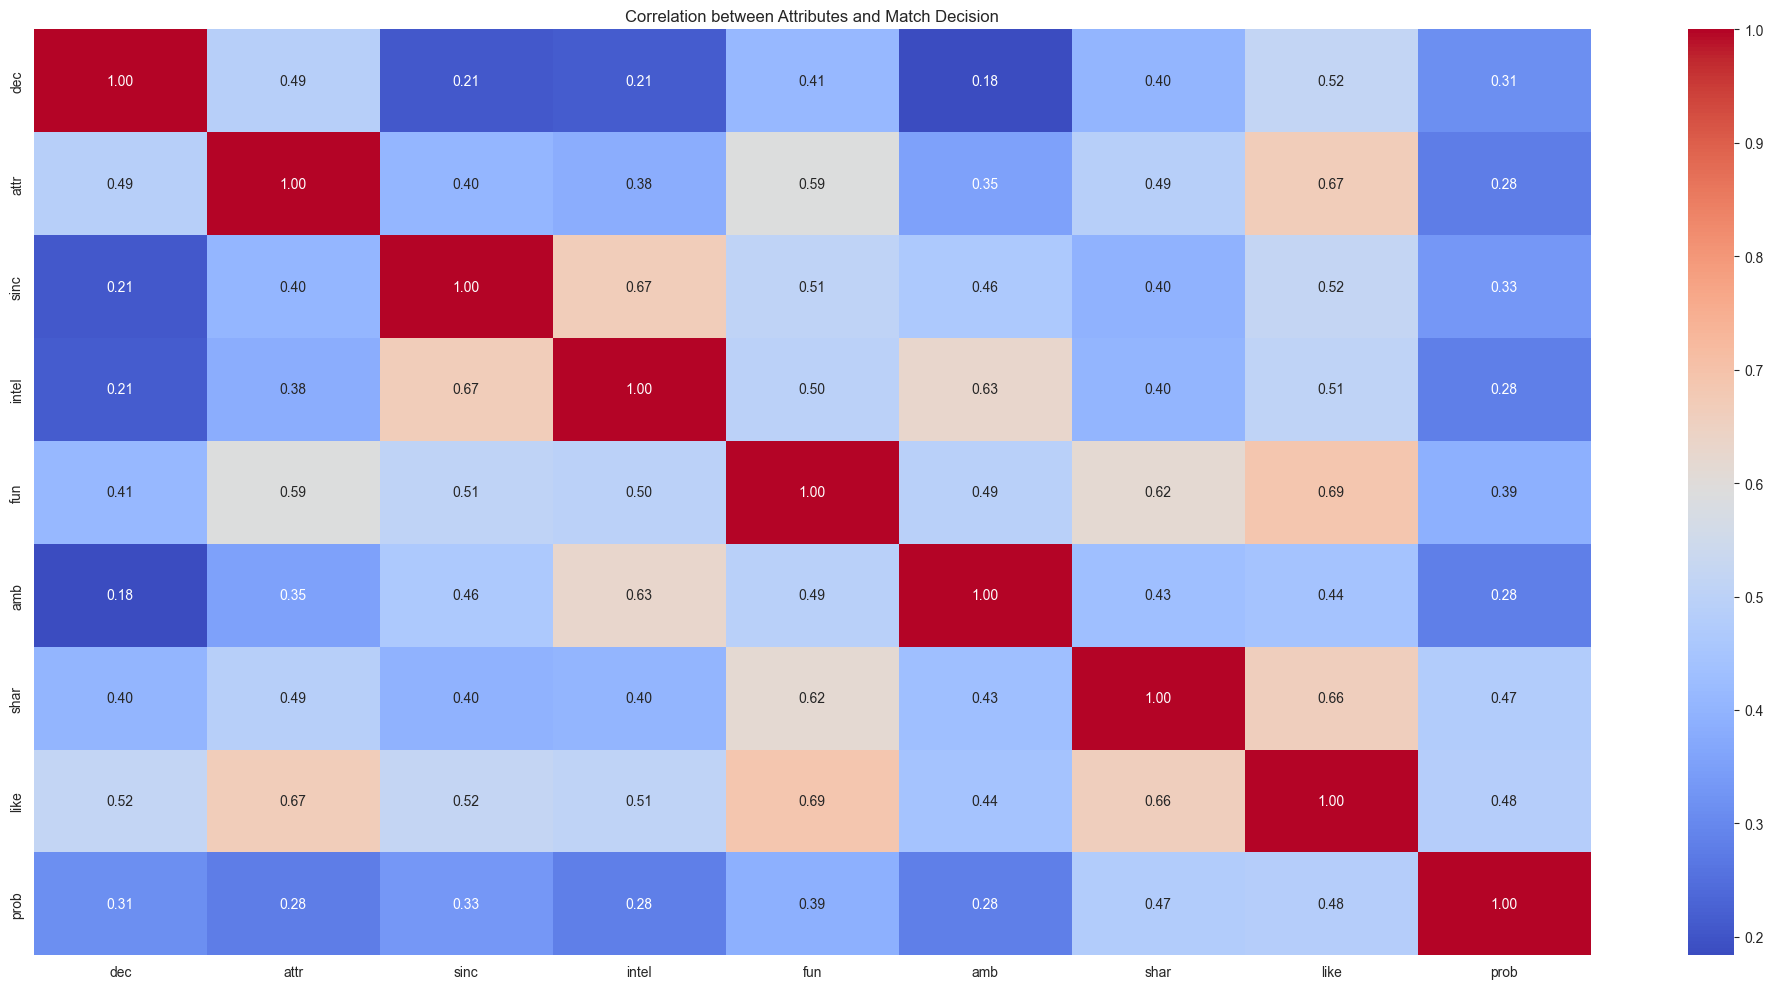

In [198]:
correlation = df[['dec', 'attr','sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']].dropna().corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation between Attributes and Match Decision')
plt.tight_layout()
plt.show()

Observation : On peut remarquer qu'il y a une forte correlation entre l'attractivité et la decision du partenaire, mais aussi la decision d'un oui (dec) et le fait d'apprecier la personne (like). Mais surtout, on peut voir que like est tres corrélé avec les attributs d'attractivité, d'amusement et d'interets partagés.

Y'a t-il un interet a communiquer avec un partenaire ou il y a eu match à la suite de l'evenement ?

/var/folders/39/9v2r64292m98c6c1_qf1hf_r0000gn/T/ipykernel_949/4014815891.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_callmatch['call_made'] = df_callmatch['you_call'] + df_callmatch['them_cal']


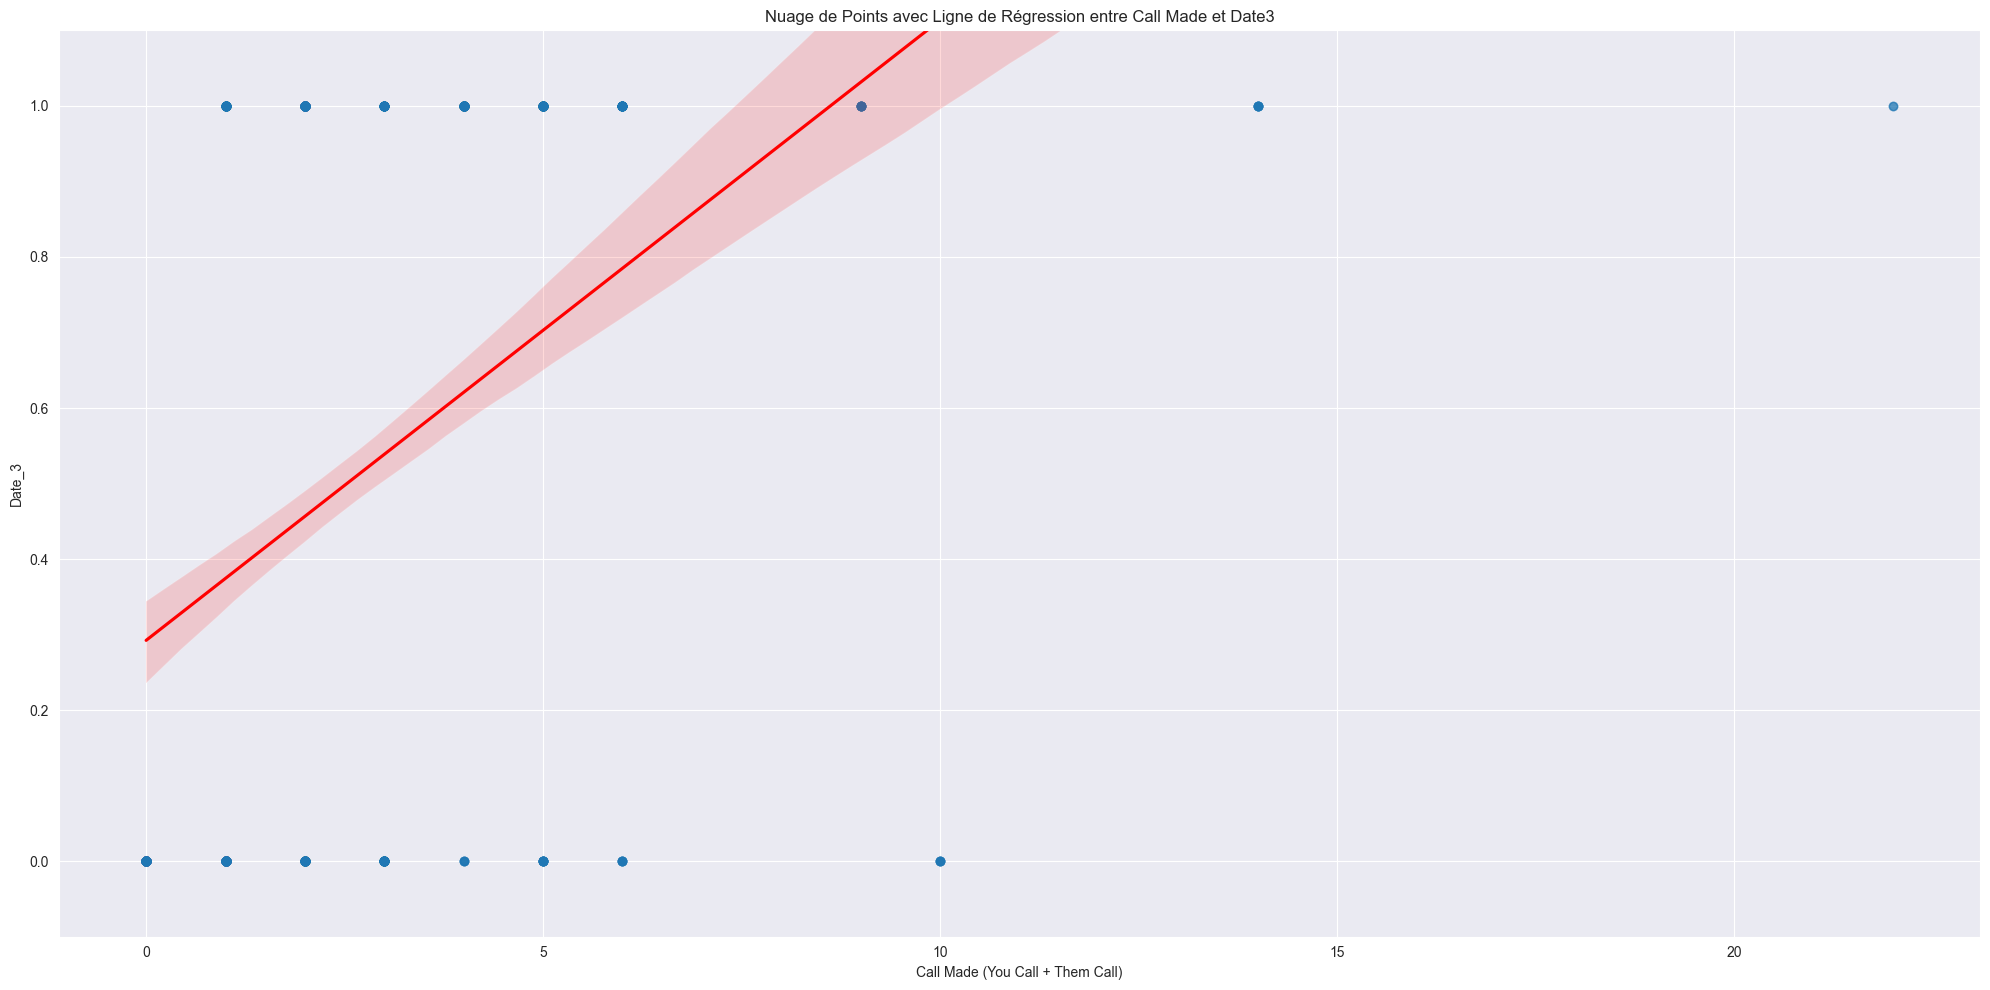

Corrélation de Spearman entre 'call_made' et 'date3': 0.5361475174558188


In [199]:
# Sélection des colonnes et renommage
df_call = df[['you_call', 'them_cal', 'match', 'date_3']]

# Filtrage des lignes où 'match' est égal à 1
df_callmatch = df_call[df_call['match'] == 1]

# Ajout de la colonne 'call_made' et suppression des valeurs manquantes
df_callmatch['call_made'] = df_callmatch['you_call'] + df_callmatch['them_cal']
df_callmatch_clean = df_callmatch.dropna()

# Calcul de la corrélation de Spearman entre 'call_made' et 'date3'
spearman_correlation = df_callmatch_clean['call_made'].corr(df_callmatch_clean['date_3'], method='spearman')

# Création d'un regplot avec une ligne de régression
plt.figure(figsize=(20, 10))
sns.regplot(x='call_made', y='date_3', data=df_callmatch_clean, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Nuage de Points avec Ligne de Régression entre Call Made et Date3')
plt.xlabel('Call Made (You Call + Them Call)')
plt.ylabel('Date_3')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Affichage de la corrélation de Spearman
print(f"Corrélation de Spearman entre 'call_made' et 'date3': {spearman_correlation}")

Observation : Ce graphique nous montre qu'il y a une forte corrélation entre le fait de communiquer avec ses matchs apres l'evenement dans le but d'avoir un second rendez vous. Plus la communication augmente plus les chances d'obtenir un second rendez vous augmente.

Comment les scores d'attributs influent sur la decision d'un match ?

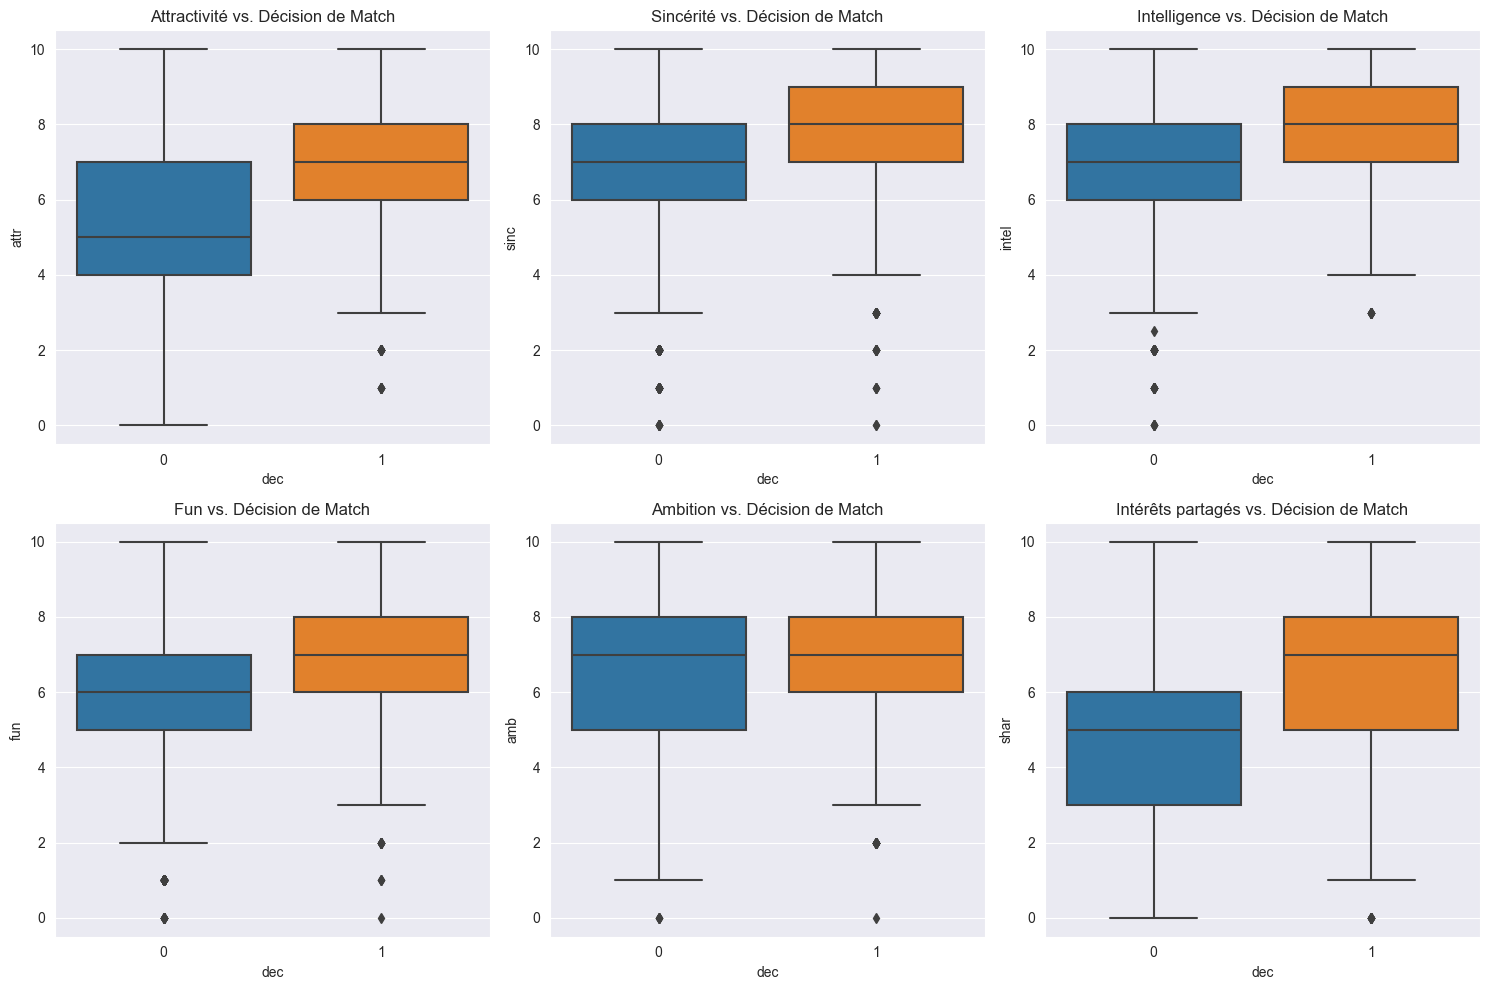

In [200]:
# Création des boxplots pour chaque attribut
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
attributs = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
titres = ['Attractivité', 'Sincérité', 'Intelligence', 'Fun', 'Ambition', 'Intérêts partagés']

for ax, attribut, titre in zip(axs.flatten(), attributs, titres):
    sns.boxplot(ax=ax, data=df, x='dec', y=attribut)
    ax.set_title(f'{titre} vs. Décision de Match')

plt.tight_layout()
plt.show()



Observation : on remarque à l'aide de ces graphes que plus les attributs ont des scores élevés plus la probabilité de match augmente, mis a part pour l'ambition ou on peut voir que le score median est le meme qu'il y ait match ou non.

Y a t-il corrélation entre les valeurs d'attractivité que se donnent les participants et ceux données par les partenaires ?

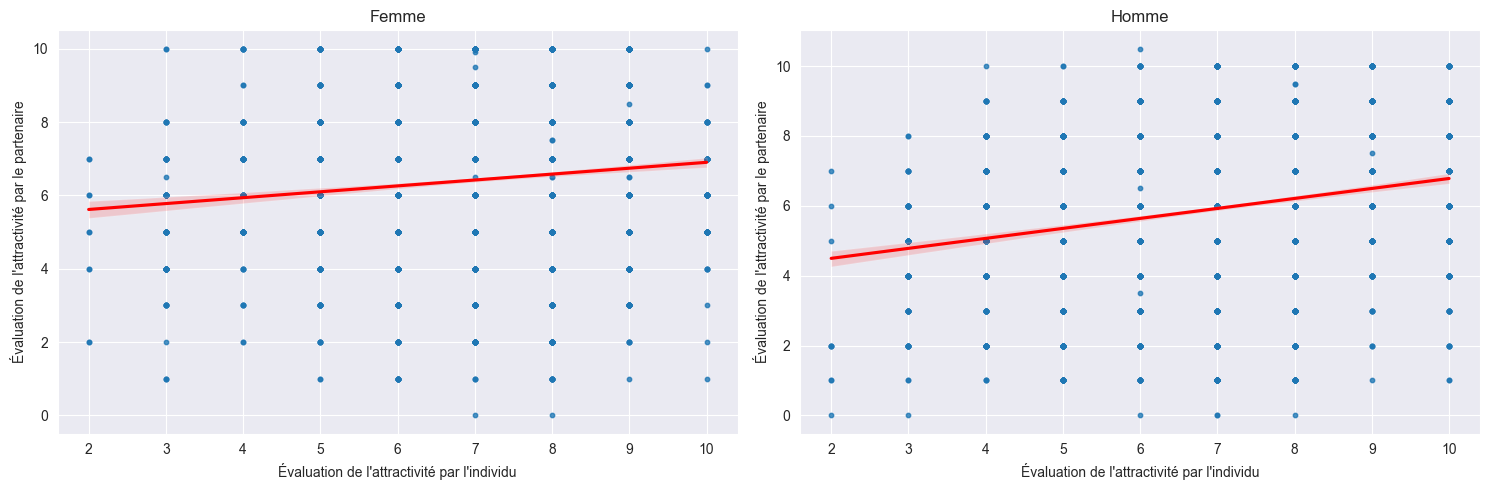

Corrélation de Pearson pour les femmes : 0.11538418046526815
Corrélation de Pearson pour les hommes : 0.20552546793014645


In [201]:
# Sélection des colonnes et suppression des valeurs manquantes
df_attr = df[['gender', 'attr3_1', 'attr_o']].dropna()

# Création des regplots pour chaque sexe
plt.figure(figsize=(15, 5))

# Regplot pour le sexe 0 (Femme)
plt.subplot(1, 2, 1)
sns.regplot(x='attr3_1', y='attr_o', data=df_attr[df_attr['gender'] == 0], scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Femme')
plt.xlabel("Évaluation de l'attractivité par l'individu")
plt.ylabel("Évaluation de l'attractivité par le partenaire")

# Regplot pour le sexe 1 (Homme)
plt.subplot(1, 2, 2)
sns.regplot(x='attr3_1', y='attr_o', data=df_attr[df_attr['gender'] == 1], scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Homme')
plt.xlabel("Évaluation de l'attractivité par l'individu")
plt.ylabel("Évaluation de l'attractivité par le partenaire")

plt.tight_layout()
plt.show()

# Calcul de la corrélation de Pearson pour chaque sexe
correlation_femme = df_attr[df_attr['gender'] == 0][['attr3_1', 'attr_o']].corr().iloc[0, 1]
correlation_homme = df_attr[df_attr['gender'] == 1][['attr3_1', 'attr_o']].corr().iloc[0, 1]

# Affichage des corrélations
print("Corrélation de Pearson pour les femmes :", correlation_femme)
print("Corrélation de Pearson pour les hommes :", correlation_homme)

Observation : On remarque que les corrélations sont plutot faibles, donc que les individus, hommes et femmes confondus n'arrivent pas à bien mesurer leur niveau d'attractivité par rapport aux scores que leurs donnent leurs partenaires.

### 6. Insights et Recommandations


   - **Principales découvertes:**

   Cette analyse a révélé plusieurs insights intéressants sur les facteurs qui influencent les décisions de match lors des événements de speed dating. L'attractivité semble jouer un rôle clé, tandis que l'ambition est moins valorisée. Le domaine d'études a une grande influence sur la décision de match, contrairement à l'appartenance d'un même groupe ethnique. Les participants ont tendance à mal evaluer leur attractivité et leur valeur perçue sur le marché du dating. Enfin, la communication apres un match semble jouer un rôle clé dans l'obtention d'un 2éme rendez vous en dehors de l'évenement.
   
   
   - **Recommandations:** En se basant sur les résultats de notre analyse, nous pouvons formuler les recommandations suivantes :

**Attirer un public plus large** : Notre etude a montré qu'il n'y avait aucune influence de l'age, de la difference d'age, voir de la race. Par conséquent, il serait bénéfique de s'adresser à un public plus large afin d'augmenter les chances de matchs. Il faudrait chercher à convertir un maximum de celibataires à utiliser l'application.

**Valoriser l'attractivité** : L'attractivité a été une caractéristique clé dans les décisions de match, indépendamment de l'âge et du sexe. On pourrait inclure des fonctionnalités qui mettent en valeur l'attractivité des utilisateurs, comme un bon système de photos de profil ou des filtres, voir des reglages predefinis de l'outil photo de l'application.

**Promouvoir les intérêts communs** : Les intérêts communs ont joué un rôle dans les décisions de match. On pourrait encourager les utilisateurs à partager leurs intérêts et à rechercher des personnes ayant des intérêts similaires. Ajouter une section "Interets" sur le profil qui sera visible aux autres utilisateurs et pourquoi pas l'integrer à l'algorithme de selection des profils.

**Encourager la communication après le match** : Les participants qui ont communiqué après l'événement ont eu plus de chances d'obtenir un deuxième rendez-vous. L'application pourrait encourager les utilisateurs à continuer à communiquer après un match, par exemple en fournissant des suggestions de conversation ou en offrant des récompenses pour l'engagement.

**Offrir des conseils personnalisés** : Les scores de perception déclarées des participants étaient souvent différentes de leurs valeurs perçues. L'application pourrait offrir des conseils personnalisés aux utilisateurs sur la manière d'améliorer leurs chances de match, par exemple en leur montrant comment leurs préférences se comparent à celles des autres.


### 7. Conclusion

   Ceci marque la fin de notre étude, nous avons pu explorer pas mal de pistes et trouver quelques insights interessants pour repondre aux problematiques de notre equipe Marketing, afin qu'ils puissent augmenter le nombre de matchs de leurs utilisateurs et ainsi les engager plus fidelement et sur le long terme.
   Ces résultats fournissent des insights précieux sur les préférences et les comportements de dating des participants à ces événements de speed dating. Cependant, il est important de noter que ces résultats sont spécifiques à ce jeu de données et ne peuvent pas être généralisables à d'autres contextes ou populations.
   On pourrait conduire d'autres analyses plus poussées en utilisant les variables non utilisées lors de cette etude pour decouvrir de nouveaux insights.